In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

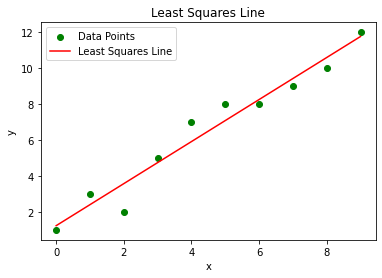

beta_0: 1.2363636363636363
beta_1: 1.1696969696969697


In [2]:
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])
X=x
x_mean = np.mean(x)
y_mean = np.mean(y)

beta_1 = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean) ** 2)

beta_0 = y_mean - beta_1 * x_mean

# Least squares line equation: y = beta_0 + beta_1 * x

# Plot the data points
plt.scatter(x, y, color='green', label='Data Points')

# Plot the least squares line
plt.plot(x, beta_0 + beta_1 * x, color='red', label='Least Squares Line')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Least Squares Line')
plt.legend()
plt.show()


print("beta_0:", beta_0)
print("beta_1:", beta_1)

In [3]:
# Predictions
y_pred = beta_0 + beta_1 * x
# Calculate SSE
SSE = np.sum((y - y_pred) ** 2)
# Calculate total sum of squares (SST)
SST = np.sum((y - y_mean) ** 2)
# Calculate R-squared
R_squared = 1 - (SSE / SST)

print("SSE:",SSE)
print("R-squared:",R_squared)


SSE: 5.624242424242423
R-squared: 0.952538038613988


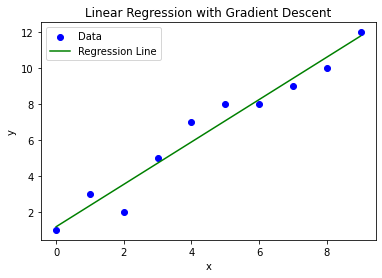

Final parameters (intercept, slope): [1.17878788 1.17878788]
Final cost: 0.2816919191919192


In [4]:
# Step 1: Initialize parameters
theta = np.zeros(2)  # [intercept, slope]

# Step 2: Define cost function
def cost_function(x, y, theta):
    m = len(y)
    y_pred = theta[0] + theta[1] * x
    cost = (1 / (2 * m)) * np.sum((y_pred - y) ** 2)
    return cost

# Step 3: Implement gradient descent
def gradient_descent(x, y, theta, learning_rate, iterations):
    m = len(y)
    costs = []
    for _ in range(iterations):
        y_pred = theta[0] + theta[1] * x
        error = y_pred - y
        gradient = (1 / m) * np.dot(error, x)
        theta -= learning_rate * gradient
        costs.append(cost_function(x, y, theta))
    return theta, costs

# Step 4: Run gradient descent
learning_rate = 0.01
iterations = 1000
theta_final, costs = gradient_descent(x, y, theta, learning_rate, iterations)

# Plotting the data and regression line
plt.scatter(x, y, color='blue', label='Data')
plt.plot(x, theta_final[0] + theta_final[1] * x, color='green', label='Regression Line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression with Gradient Descent')
plt.legend()
plt.show()

# Print the final parameters and cost
print("Final parameters (intercept, slope):", theta_final)
print("Final cost:", costs[-1])

In [5]:
df = pd.read_csv("Housing.csv")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700


In [6]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [7]:
m=df['total_bedrooms'].mean()
m

537.8705525375618

In [8]:
df['total_bedrooms']=df['total_bedrooms'].fillna(m)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700


In [9]:
df.isnull().sum().sum()

0

In [12]:
correlation = df.corr()['median_house_value'].abs().sort_values(ascending=False)

# Select the attribute with the highest correlation (excluding 'medv' itself)
best_attribute = correlation.index[1]

print("Best attribute with highest correlation to 'median_house_value ':", best_attribute)
print("Correlation coefficient:", correlation[1])

Best attribute with highest correlation to 'median_house_value ': median_income
Correlation coefficient: 0.6880752079585577


In [19]:
from sklearn.model_selection import train_test_split

X= df[[best_attribute]].values.reshape(-1,1)
y = df['median_house_value'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)


X_train_with_intercept = np.c_[np.ones(X_train.shape[0]), X_train]
X_test_with_intercept = np.c_[np.ones(X_test.shape[0]), X_test]

# Define hypothesis function
def h_theta(X, theta):
    return np.dot(X, theta)

theta_analytic = np.linalg.inv(X_train_with_intercept.T.dot(X_train_with_intercept)).dot(X_train_with_intercept.T).dot(y_train)
print("Coefficients using Analytic Formulation:", theta_analytic)

# Gradient Descent - Full-Batch
def gradient_descent(X, y, theta, alpha, epochs):
    m = len(y)
    for _ in range(epochs):
        gradient = (1/m) * np.dot(X.T, (h_theta(X, theta) - y))
        theta = theta - alpha * gradient
    return theta

# Gradient Descent - Stochastic
def stochastic_gradient_descent(X, y, theta, alpha, epochs):
    m = len(y)
    for _ in range(epochs):
        for i in range(m):
            random_index = np.random.randint(m)
            xi = X[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            gradient = np.dot(xi.T, (h_theta(xi, theta) - yi))
            theta = theta - alpha * gradient
    return theta

theta_full_batch = gradient_descent(X_train_with_intercept, y_train, np.zeros(X_train_with_intercept.shape[1]), alpha=0.01, epochs=100)
print("Gradient Descent - Full-Batch Theta:", theta_full_batch)

theta_stochastic = stochastic_gradient_descent(X_train_with_intercept, y_train, np.zeros(X_train_with_intercept.shape[1]), alpha=0.01, epochs=100)
print("Gradient Descent - Stochastic Theta:", theta_stochastic)


Coefficients using Analytic Formulation: [43743.73216135 42227.93460206]
Gradient Descent - Full-Batch Theta: [15984.88615415 48082.092794  ]
Gradient Descent - Stochastic Theta: [43784.17665055 38393.89000509]


In [23]:
# SSE function
def calculate_sse(y_true, y_pred):
    return np.sum((y_true - y_pred) ** 2)

# R-squared function
def calculate_r_squared(y_true, y_pred):
    sse = calculate_sse(y_true, y_pred)
    sst = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (sse / sst)

# Analytic formulation
y_pred_analytic = h_theta(X_test_with_intercept, theta_analytic)
sse_analytic = calculate_sse(y_test, y_pred_analytic)
r_squared_analytic = calculate_r_squared(y_test, y_pred_analytic)

# Full-Batch Gradient Descent
y_pred_full_batch = h_theta(X_test_with_intercept, theta_full_batch)
sse_full_batch = calculate_sse(y_test, y_pred_full_batch)
r_squared_full_batch = calculate_r_squared(y_test, y_pred_full_batch)

# Stochastic Gradient Descent
y_pred_stochastic = h_theta(X_test_with_intercept, theta_stochastic)
sse_stochastic = calculate_sse(y_test, y_pred_stochastic)
r_squared_stochastic = calculate_r_squared(y_test, y_pred_stochastic)

#printing the values
print("Analytic Formulation: SSE =", sse_analytic, ", R-squared =", r_squared_analytic)
print("Full-batch Gradient Descent: SSE =", sse_full_batch, ", R-squared =", r_squared_full_batch)
print("Stochastic Gradient Descent: SSE =", sse_stochastic, ", R-squared =", r_squared_stochastic)

Analytic Formulation: SSE = 57795528980489.64 , R-squared = 0.47198148163431675
Full-batch Gradient Descent: SSE = 59363888976793.33 , R-squared = 0.45765298363247586
Stochastic Gradient Descent: SSE = 59596158185779.625 , R-squared = 0.4555309779037574
